In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from datetime import datetime, time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys


CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
ROOT =  os.path.join(CURR_PATH)
DATA =  os.path.join(ROOT, 'data')
FIG =  os.path.join(ROOT, 'fig')
sys.path.append(os.path.join(ROOT,'modules'))

import stocks as stocks
import features as feat
import plot as pl
import style as style
style.set_style()


Style set


In [2]:
df_betsson = stocks.GoogleIntradayQuote('BETS-B',24*60*60,1,'Y')
df_unibet = stocks.GoogleIntradayQuote('KIND-SDB',24*60*60,1,'Y')

http://finance.google.com/finance/getprices?q=BETS-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=KIND-SDB&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v


In [4]:
df_betsson.head()

,stock,open,high,low,close,volume
datetime,,,,,,
2017-05-24 13:00:00,BETS-B,76.50,79.15,76.00,79.15,873472.0
2017-05-26 17:30:00,BETS-B,78.70,81.35,78.65,80.95,1077865.0
2017-05-29 17:30:00,BETS-B,80.90,80.95,77.50,77.50,774613.0
2017-05-30 17:30:00,BETS-B,77.55,80.25,77.55,80.15,1218675.0
2017-05-31 17:30:00,BETS-B,80.05,81.25,78.30,79.25,1168962.0


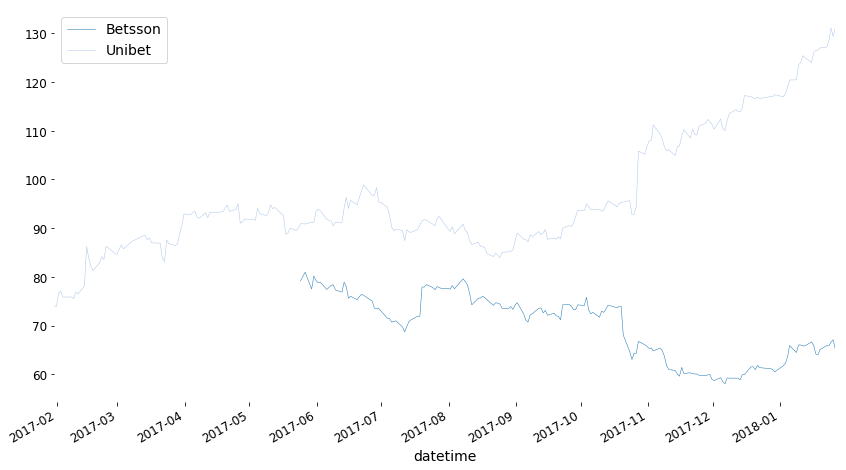

In [7]:
ax = df_betsson['close'].plot()
df_unibet['close'].plot(ax = ax)
ax.legend(['Betsson', 'Unibet'])

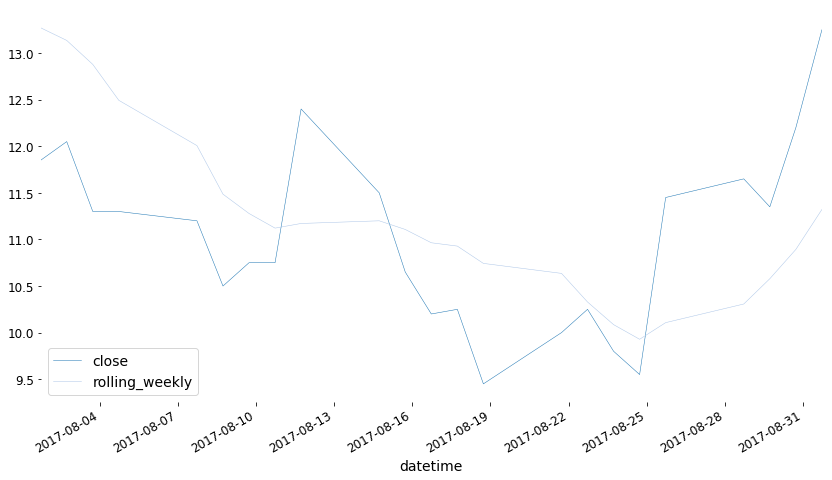

In [21]:
df_pair = (df_unibet['close']-df_betsson['close']).to_frame()
df_pair['rolling_weekly'] = df_pair.rolling(7).mean()
df_pair[(df_pair.index>pd.to_datetime('2017-08-01')) &
        (df_pair.index<pd.to_datetime('2017-09-01'))].plot()